In [10]:
from bs4 import BeautifulSoup
import requests
from pandas.io.html import read_html
import pandas as pd
from matplotlib import pyplot as plt 
import pandas as pd

In [11]:
source=requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup=BeautifulSoup(source)


In [12]:
all_tables=soup.find_all('table')
right_table=soup.find('table', class_='wikitable sortable')


In [13]:
A=[]
B=[]
C=[]

for i,row in enumerate(right_table.findAll('tr')):
    cells = right_table.findAll('tr')[i].findAll('td')
    #states=row.findAll('th') #To store second column data
    if len(cells)==3: #Only extract table body not heading
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))


In [14]:
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [15]:
df=df.loc[df['Borough'] != 'Not assigned']
df.head()

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


Text(0.5,0,'Neighborhood')

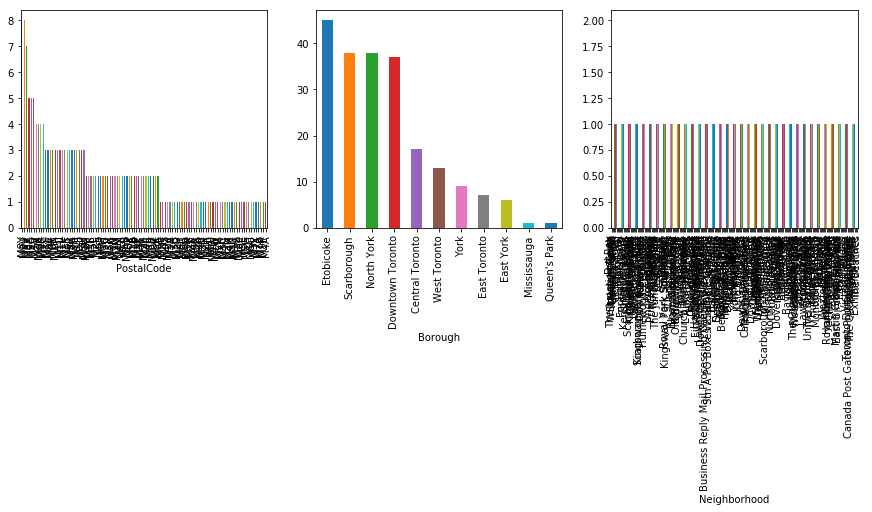

In [16]:
ax1=plt.subplot(1,3,1)
ax1=df['PostalCode'].value_counts().plot(kind='bar',figsize=(15,4))
ax1.set_xlabel('PostalCode')

ax2=plt.subplot(1,3,2)
ax2=df['Borough'].value_counts().plot(kind='bar',figsize=(15,4))
ax2.set_xlabel('Borough')

ax3=plt.subplot(1,3,3)
ax3=df['Neighborhood'].value_counts().plot(kind='bar',figsize=(15,4))
ax3.set_xlabel('Neighborhood')

In [17]:
import pandas as pd
#open(r'C:Users/zoharko/Documents/Python Scripts/Data Scientist Course/Capstone Project Notebook/Geospatial_Coordinates.csv', mode='r')
open(r'C:\Users\zoharko\Documents\Python Scripts\Data Scientist Course\Capstone Project Notebook\Geospatial_Coordinates.csv')
postal_code=pd.read_csv(r'C:\Users\zoharko\Documents\Python Scripts\Data Scientist Course\Capstone Project Notebook\Geospatial_Coordinates.csv')

In [23]:
postal_code.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [29]:
df1=pd.merge(df, postal_code, left_on=  ['PostalCode'],
                   right_on= ['Postal Code'], 
                   how = 'left')

In [34]:
df1.drop('Postal Code',axis=1,inplace=True)

In [35]:
df1.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763
